# Classificazione e Sentiment analysis su post provenienti da Reddit

**Studente:** Rosario Cannavò
<br>
**Matricola:** 1000004011
<br>
**A.A:** 2021/2022

## 1. Introduzione

Come già noto, Reddit è un social network caratterizzato da una struttura simile ai primissimi forum che popolavano internet fino a qualche anno fa e fornivano un pensiero attuale sui vari topic che affrontavano. Riprendendo questo concetto si vuole addestrare un algoritmo di machine learning che opportunamente addestrato e ottimizzato riesca a classificare la categoria di un post. Successivamente si vuole anche predirre il linguaggio di cui si sta parlando tramite l'uso dello stesso algoritmo ma addestrato diversamente per portare a termine questa tipologia di task. Nello specifico, verranno allenate  due istanze dell'algoritmo su post che provengono da vari subreddit che trattano di linguaggi di programmazione e da altri il cui argomento di interesse è diverso dal mondo della programmazione e dell'informatica in generale. In questo modo alla fine del training i due algoritmi saranno in grado di classificare correttamente i post. 
L'algoritmo utilizzato sarà il K-Nearest Neighbour e delle sue ottimizzazioni. I punti su cui lavorerà l'algoritmo saranno i vettori bag of words opportunamente estrapolati dai post di esempio. 
Dopo aver effettuato la classificazione, una seconda parte del progetto consisterà nel calcolare il sentiment dei post che parlano di programmazione per osservare di quali linguaggi si parla positivamente e di quali negativamente. Per fare ciò verrà utilizzato l'algoritmo VADER e in conclusione verrà calcolata la media delle valutazioni per ogni linguaggio, in questo modo sarà possibile capire se generalmente gli utenti di Reddit utilizzano il social network per esporre difetti e lamentele dei vari linguaggi o per elogiarne le funzionalità e le potenzialità, potremo inoltre capire quale linguaggio è maggiormente supportato dai suoi utenti.  

Per accedere ai contenuti dei vari subreddit utilizzeremo le API di Reddit fornite dal wrapper Praw. Come citato nel tutorial ([Tutorial Reddit](https://github.com/rosariocannavo/TutorialSocialMediaManagement)), per avere accesso sarà necessario registrarsi a Reddit come programmatori e riscattare i token di identificazione.

In [1]:
import praw 
reddit = praw.Reddit(client_id = 'tvHkTZ-wanEENSM1GSdQ5w',
                     client_secret = 'kw-wzX7cNVvYYi8VBCjxjQp5C2Pn9Q',
                     username = 'tutorialSocialMedia',
                     password = 'password123',
                     user_agent = 'tutorialpython'
                    )

## 2. Estrazione dei dati e creazione del dataset

Dopo aver ottenuto l'oggetto **reddit**, potremo esplorare i vari subreddit del social network utilizzando i metodi del wrapper. Nelle prossime righe sarà effettuata l'estrapolazione dei post più recenti in modo da costruire un dataset di partenza su cui addestrare e testare gli algoritmi che saranno utilizzati.
E' importante notare che il numero di post ritornati dal metodo "hot" non è fisso, per tale motivo è stabilito un limite superiore (posto a 5000) per evitare di appesantire e rallentare eccessivamente l'algoritmo.

I post sono nello specifico ottenuti dai subreddit: "Python", "C++", "Sushi", "Guitar", "Kotlin", "nba","news", "Europe", "Angular", "Motorcycles","PHP", "Damnthatsinteresting", "Golang" e "AskReddit".
Inoltre, conoscendo la provenienza dei post durante la fase di costruzione del dataset, è stato assegnato ad ognuno di essi, la classe di appartenenza "reale". Le possibili classi sono "**programming**" e "**non programming**", ad indicare la natura del post. Allo stesso modo saremo in grado di assegnare ad ogni osservazione il linguaggio di cui tratta. 

In [2]:
subred = reddit.subreddit("Python")

In [3]:
import pandas as pd
df1 = []
for post in subred.hot(limit=5000):
    df1.append([post.title[:40], post.selftext, "programming", "Python"])
df1 = pd.DataFrame(df1, columns=["title","text","class", "language"])

In [4]:
df1.head()

,title,text,class,language
0,Sunday Daily Thread: What's everyone wor,Tell /r/python what you're working on this wee...,programming,Python
1,Tuesday Daily Thread: Advanced questions,Have some burning questions on advanced Python...,programming,Python
2,I made a CLI-version of Wordle in Python,Hopefully I am not too late to the party! I am...,programming,Python
3,High Performance subset of python,Python is the slowest* of the major languages....,programming,Python
4,I created a fun Python project using ML,,programming,Python


Prendiamo adesso dei post da un altro subreddit che parla di programmazione, ad esempio il subreddit di C++:

In [5]:
subred = reddit.subreddit("cpp")  

In [6]:
df2 = []
for post in subred.hot(limit=5000):
    df2.append([post.title[:40], post.selftext, "programming", "C++"])
df2 = pd.DataFrame(df2, columns=["title","text","class", "language"])

In [7]:
df2.head()

,title,text,class,language
0,C++ Jobs - Q1 2022,Rules For Individuals\n---------------------\n...,programming,C++
1,C++ Show and Tell - Experiment,"Recently, we've been getting an uptick of ""loo...",programming,C++
2,C++'s Superpower - Matt Godbolt - CPPP 2,,programming,C++
3,P2300 (Sender/Receiver) is DEAD in the w,"""No consensus. There is sustained strong oppos...",programming,C++
4,Constant references are not always your,,programming,C++


Prendiamo adesso dei post da un subreddit che parla di sushi:

In [8]:
subred = reddit.subreddit("sushi")  

df3 = []
for post in subred.hot( limit=5000):
    df3.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df3 = pd.DataFrame(df3, columns=["title","text","class", "language"])

In [9]:
df3.head()

,title,text,class,language
0,First time making sushi fully by myself!,,non programming,Not a language
1,Made some sushi for dinner.,,non programming,Not a language
2,Epic sushi night!,,non programming,Not a language
3,Hamachi,,non programming,Not a language
4,Just an assortment from heaven,,non programming,Not a language


E dei post da un subreddit che parla di chitarre:

In [10]:
subred = reddit.subreddit("Guitar")  

df4 = []
for post in subred.hot( limit=5000):
    df4.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df4 = pd.DataFrame(df4, columns=["title","text","class", "language"])

In [11]:
df4.head()

,title,text,class,language
0,[DISCUSSION] - February 2022 - NO STUPID,\n\nGood Day [r/Guitar](https://www.reddit.co...,non programming,Not a language
1,[PLAY] R/GUITAR - Players Spotlight - Fe,Hello [r/Guitar](https://www.reddit.com/r/Guit...,non programming,Not a language
2,[QUESTION] What popular guitar / guitar,"For me, it's the SG. They're popular with some...",non programming,Not a language
3,[NEWBIE] Believe the hype - JustinGuitar,So... I've been playing for more than a decade...,non programming,Not a language
4,[QUESTION] Recommendations for high qual,I've got a small Park amp at the moment (40w) ...,non programming,Not a language


In [12]:
subred = reddit.subreddit("Kotlin")  

df5 = []
for post in subred.hot( limit=5000):
    df5.append([post.title[:40], post.selftext, "programming", "Kotlin"])
df5 = pd.DataFrame(df5, columns=["title","text","class", "language"])

In [13]:
df5.head()

,title,text,class,language
0,"Enum.hashCode isn't stable, so why is it",I ran into [this footgun](https://madhead.me/p...,programming,Kotlin
1,Trying Insertion sort in Kotlin,"Can someone please review my code, why its not...",programming,Kotlin
2,"Fake It, but Don't Make It",More exploration of Test Driven Development an...,programming,Kotlin
3,Experiences with Kotlin OR Frameworks,We're a small team working on Spring Boot-base...,programming,Kotlin
4,Exploring Photo Picker in Android 13,,programming,Kotlin


In [14]:
subred = reddit.subreddit("nba")  

df6 = []
for post in subred.hot( limit=5000):
    df6.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df6 = pd.DataFrame(df6, columns=["title","text","class", "language"])

In [15]:
df6.head()

,title,text,class,language
0,Daily Discussion Thread + Game Thread In,"# Game Threads Index (February 15, 2022):\n\n|...",non programming,Not a language
1,[SERIOUS NEXT DAY THREAD] Post-Game Disc,"Here is a place to have in depth, x's and o's,...",non programming,Not a language
2,[Fischer] Durant and Nash wanted a free-,https://bleacherreport.com/articles/2953512-in...,non programming,Not a language
3,James Harden teaching Joel Embiid how to,,non programming,Not a language
4,[Charania] Goran Dragic has agreed to a,,non programming,Not a language


In [16]:
subred = reddit.subreddit("news")  

df7 = []
for post in subred.hot( limit=5000):
    df7.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df7 = pd.DataFrame(df7, columns=["title","text","class", "language"])

In [17]:
df7.head()

,title,text,class,language
0,FBI: Americans Lost $1 Billion to Romanc,,non programming,Not a language
1,Long Island Man Claims Cops Ripped Off H,,non programming,Not a language
2,Sandy Hook families settle with gun make,,non programming,Not a language
3,Alexei Navalny faces 15 more years in pr,,non programming,Not a language
4,Major banks pledging net zero are pourin,,non programming,Not a language


In [18]:
subred = reddit.subreddit("europe")  

df8 = []
for post in subred.hot( limit=5000):
    df8.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df8 = pd.DataFrame(df8, columns=["title","text","class", "language"])

In [19]:
df8.head()

,title,text,class,language
0,What happened in your country this week?,**Welcome to the weekly European news gatherin...,non programming,Not a language
1,Ukraine-Russia Conflict Megathread 4,‎As news of the confrontation between Ukraine ...,non programming,Not a language
2,"""When a slave sets foot in Serbia, he/sh",,non programming,Not a language
3,A random fact I recently noticed: Italy,,non programming,Not a language
4,Belgium approves four-day week and gives,,non programming,Not a language


In [20]:
subred = reddit.subreddit("angular")  

df9 = []
for post in subred.hot( limit=5000):
    df9.append([post.title[:40], post.selftext, "programming", "Angular"])
df9 = pd.DataFrame(df9, columns=["title","text","class", "language"])

In [21]:
df9.head()

,title,text,class,language
0,Angular 12 in depth,,programming,Angular
1,RxJS in Angular: from beginner to advanc,,programming,Angular
2,How to Contribute to Angular Material —,,programming,Angular
3,Is it possible to get webpack.config.js,"I know how to custom webpack, but I still want...",programming,Angular
4,Approach for Creating a Landing Page,Hi. I'm fairly new with Angular. I'm creating ...,programming,Angular


In [22]:
subred = reddit.subreddit("Motorcycles")  

df10 = []
for post in subred.hot( limit=5000):
    df10.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df10 = pd.DataFrame(df10, columns=["title","text","class", "language"])

In [23]:
df10.head()

,title,text,class,language
0,REMINDER: Riding season is almost here!,# [Quick Link To Current Superthread](https://...,non programming,Not a language
1,Purchase Advice Superthread,# PURCHASE ADVICE SUPERTHREAD!\n\nA dedicated ...,non programming,Not a language
2,body position practice,,non programming,Not a language
3,Master of aquaplanning,,non programming,Not a language
4,Anyone have ideas about my aftermarket t,,non programming,Not a language


In [24]:
subred = reddit.subreddit("PHP")  

df11 = []
for post in subred.hot( limit=5000):
    df11.append([post.title[:40], post.selftext, "programming", "PHP"])
df11 = pd.DataFrame(df11, columns=["title","text","class", "language"])

In [25]:
df11.head()

,title,text,class,language
0,"Weekly ""ask anything"" thread",Hey there!\n\nThis subreddit isn't meant for h...,programming,PHP
1,PHP Benchmarks (2022) for 14 different P,I'm back almost a year later with a new round ...,programming,PHP
2,[need help] From Go to PHP,Hi. I've been developing in Go for over 6 year...,programming,PHP
3,Integrate Firebase web notification in t,Web notifications are messages sent to a visit...,programming,PHP
4,What are good resources for learning PHP,Where can I find materials on automated testin...,programming,PHP


In [26]:
subred = reddit.subreddit("Damnthatsinteresting")  

df12 = []
for post in subred.hot( limit=5000):
    df12.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df12 = pd.DataFrame(df12, columns=["title","text","class", "language"])

In [27]:
df12.head()

,title,text,class,language
0,Map shows Netherlands progress in flood,,non programming,Not a language
1,Women who previously worked in Clinical,,non programming,Not a language
2,Dog eating a shark while 2 snakes fight,,non programming,Not a language
3,3D modelling just by walking around the,,non programming,Not a language
4,Digital artists recreated the changes of,,non programming,Not a language


In [28]:
subred = reddit.subreddit("golang")  

df13 = []
for post in subred.hot( limit=5000):
    df13.append([post.title[:40], post.selftext, "programming", "Go"])
df13 = pd.DataFrame(df13, columns=["title","text","class", "language"])

In [29]:
df13.head()

,title,text,class,language
0,CloverDB,"Hi, all! I wrote a storage project in Golang. ...",programming,Go
1,Continuous Build and Deployment of Go Ap,,programming,Go
2,mature alternative for webview?,I was playing around with [webview](https://gi...,programming,Go
3,log in and modules I could make use of,Hi fellow Gophers! I'm a new gopher who is sti...,programming,Go
4,When does a Goroutine actually start exe,I'm in the middle of learning go and especiall...,programming,Go


In [30]:
subred = reddit.subreddit("AskReddit")  

df14 = []
for post in subred.hot( limit=5000):
    df14.append([post.title[:40], post.selftext, "non programming", "Not a language"])
df14 = pd.DataFrame(df14, columns=["title","text","class", "language"])

In [31]:
df14.head()

,title,text,class,language
0,What’s one thing your partner doesn’t kn,,non programming,Not a language
1,What pisses you off instantly?,,non programming,Not a language
2,What makes you nope out of reading a lon,,non programming,Not a language
3,What's the most uncomfortable compliment,,non programming,Not a language
4,"People who live in the US, how would you",,non programming,Not a language


Dopo aver ottenuto i vari post provenienti dai subreddit presi in analisi ed averli memorizzati opportunamente in dei **Pandas dataframe**, costruiamo un unico dataset in grado di contenerli tutti in modo da lavorare più agilmente sui dati raccolti. Durante questa fase inoltre, saranno rimossi dal dataset tutti i record in cui non è presente del testo, infatti, in questi ultimi sono presenti immagini o link non utili ai fini dell'addestamento dell'algoritmo.

In [32]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14]
dataset = pd.concat(frames, ignore_index=True)
dataset = dataset.drop(dataset[dataset.text == ""].index)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4798 entries, 0 to 9622
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4798 non-null   object
 1   text      4798 non-null   object
 2   class     4798 non-null   object
 3   language  4798 non-null   object
dtypes: object(4)
memory usage: 187.4+ KB


Una volta ottenuto il dataframe che rappresenta i dati raccolti, utilizziamo la libreria **sklearn**  che ci fornirà tutti gli strumenti per portare a termine il task di classificazione, dalla creazione dei set su cui lavorare, l'algoritmo vero e proprio e al calcolo delle misure di valutazione.

Come appena citato il primo passo da effettuare è quello di dividere il dataset in due parti, per fare ciò utilizziamo il **metodo holdout**, ovvero assegneremo al training set l'**X%** delle osservazioni e al test set il restante **100-X%** delle osservazioni. Nel nostro caso avremo che **X = 25%**.

In [33]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(1234)

train_set, test_set = train_test_split(dataset, test_size=0.25)
train_set.info(); print('\n'); test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3598 entries, 2 to 6090
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     3598 non-null   object
 1   text      3598 non-null   object
 2   class     3598 non-null   object
 3   language  3598 non-null   object
dtypes: object(4)
memory usage: 140.5+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 6673 to 2557
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1200 non-null   object
 1   text      1200 non-null   object
 2   class     1200 non-null   object
 3   language  1200 non-null   object
dtypes: object(4)
memory usage: 46.9+ KB


Osserviamo graficamente come sono disposte le osservazioni all'interno del training set, in genere è buona norma che il training set sia **bilanciato** ovvero che le osservazioni appartenenti all'insieme siano ripartite in egual misura in base alla loro classe. 

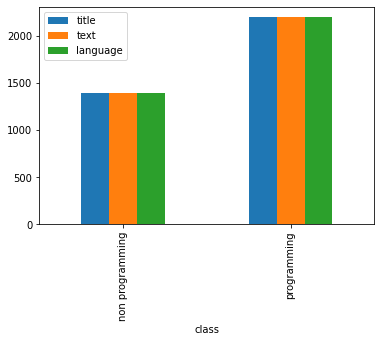

In [34]:
from matplotlib import pyplot as plt
train_set.groupby('class').count().plot.bar()
plt.show()

Possiamo adesso osservare parte dei due set per verificare che essi siano stati creati correttamente.

In [35]:
train_set.head()

,title,text,class,language
2,I made a CLI-version of Wordle in Python,Hopefully I am not too late to the party! I am...,programming,Python
7258,"Do you consider yourselves ""Adrenaline J","I've noticed a lot people call themselves ""adr...",non programming,Not a language
2976,Don't know where to begin,I've learned how to program in Kotlin through ...,programming,Kotlin
2959,Questions about a project I'm working on,I volunteered to attempt to put together what ...,programming,Kotlin
165,I made an automatic Scrabble solver,&#x200B;\n\nhttps://reddit.com/link/snzlvj/vid...,programming,Python


In [36]:
test_set.head()

,title,text,class,language
6673,Yamaha MT03 steering suddenly feels weir,Hi /rmotorcycles\n\nI've got a 2017 Yamaha MT0...,non programming,Not a language
2477,[GEAR] NGD My setup with a new PRS McCar,[New PRS McCarty 10 Top](https://imgur.com/a/y...,non programming,Not a language
4457,Highschool LaMelo asking if Luka Doncic,Who remembers that Ball in the Family episode ...,non programming,Not a language
4497,"Per Sam Amick on the Deuce & Mo Podcast,",Find it hilarious that the Lakers would even t...,non programming,Not a language
2411,Electric guitar to learn on [newbie],I wanna learn electric guitar\nAfter an age of...,non programming,Not a language


## 3. Rappresentazione Bag of Word e creazione del vettore BOW

Dopo aver ottenuto i set su cui lavorare è necessario applicare ad essi una **funzione di trasformazione** che permetta di rappresentare in una forma comprensibile all'algoritmo.
A tal proposito utilizziamo la rappresentazione **Bag of Words** che dato un corpus di documenti (i nostri post) ritorna una rappresentazione che non considera l'ordine o il significato delle parole: dopo una fase di pre-processing in cui vengono applicati alcuni step della **NLP pipeline** ad ogni post verrà associato un ***vettore di lunghezza fissa*** che lo rappresenta in cui saranno evidenziati soltanto i termini appartenenti a quello specifico documento.
Per effettuare quest'operazione utilizzeremo ancora **sklearn** e in particolare l'oggetto **CountVectorizer**.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [38]:
x_train = count_vect.fit_transform(train_set['text'])
x_train

<3598x25560 sparse matrix of type '<class 'numpy.int64'>'
	with 262126 stored elements in Compressed Sparse Row format>

Come possiamo notare, dopo l'applicazione della funzione, il training set verrà rappresentato attraverso una **sparse matrix** e non più come un **dataframe**, questo per ottimizzare lo spazio occupato.

In [39]:
print(len(count_vect.vocabulary_))

25560


Un'altra importante informazione da visualizzare è la lunghezza del **vocabolario**, essa infatti rappresenta il numero di token estratti dal corpus. A partire da questa grandezza, ogni post verrà rappresentato tramite un vettore di lunghezza pari alla grandezza del vocabolario.

## 4. Classificazione kNN con k pari 1

L'algoritmo **kNN** nasce come ottimizzazione dell'algoritmo **Neirest Neighbour**, infatti **k** è un **iperparametro** che rappresenta il numero di vicini nell'intorno dell'osservazione da classificare che verranno considerati per stimare la classe del dato in input.

Come prima cosa applichiamo il kNN nella sua versione **Naive** (k=1) per osservarne i risultati.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  #impostiamo il numero di vicini pari a uno

Effettuiamo il training tramite la funzione **fit** fornita da sklearn:

In [41]:
knn.fit(x_train, train_set['class'])

KNeighborsClassifier(n_neighbors=1)

Dopo aver addestrato il classificatore è possibile effettuare una prova applicandolo su un'osservazione del test set che non ha mai visto e confrontandola con la classe di appartenenza reale. L'algoritmo è addestrato sulla rappresentazione bow dei post, sarà dunque prima necessario trasformare anche l'osservazione in input opportunamente:

In [42]:
test = test_set.iloc[1]['text']
trueclass = test_set.iloc[1]['class']
test

'[New PRS McCarty 10 Top](https://imgur.com/a/y7OKUsW)\n\nJust got this today. Very excited. Always wanted a PRS and I finally got one. \n\nThis thing is so pretty and super playable. I think I’m a fan of the thicker neck compared to my Strat.'

In [43]:
feats=count_vect.transform([test])
feats

<1x25560 sparse matrix of type '<class 'numpy.int64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [44]:
print("classe predetta:", knn.predict(feats)[0])
print("classe reale:", trueclass)

classe predetta: programming
classe reale: non programming


Calcoliamo adesso la predizione su tutti gli elementi del test set per poi poter ricavare delle **misure di performance** del classificatore:

In [45]:
x_test = count_vect.transform(test_set['text'])
y_test_pred = knn.predict(x_test)

Come misura utilizzeremo l'**f1-score**, una misura ottenuta come **la media armonica di precision e recall** che fornisce una **visuale completa** della bontà del classificatore.

In [46]:
from sklearn.metrics import f1_score

f1_scores = f1_score(test_set['class'], y_test_pred, average=None, labels=['programming'])[0]
print("F1-score K = 1:", f1_scores)

F1-score K = 1: 0.7944111776447106


Per avere contezza degli errori del classificatore, essendo agevolati dalla situazione binaria in cui ci troviamo è possibile visualizzare la **confusion matrix** che fornisce la quantità di osservazioni classificate correttamente e la tipologia di errori commessi, in genere si preferiscono valori alti sulla diagonale principale e viceversa valori bassi sulla diagonale secondaria. Infatti, essendo rappresentate sull'asse delle ascisse i valori **predetti** e su quella delle ordinate i valori **reali** le osservazioni per cui i due valori coincidono (diagonale principale) saranno quelle classificate correttamente.

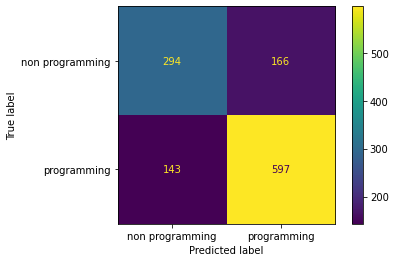

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_pred)

## 5. Stima del K migliore

Come detto prima, k è un iperparametro che va ottimizzato sulla base di un **validation set**, infatti al fine di ottenere il massimo rendimento dal classificatore, k va scelto con criterio. Per effettuare il **"tuning"** di k, verra usata ancora sklearn, in particolare tramite il metodo **GridSearchCV** verranno testati vari k (***da 1 a 20***): il k che otterrà f1score migliore verrà scelto come iperaparametro.

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train,train_set['class'])
bestK= gs.best_params_['n_neighbors']

Cerchiamo adesso un **riscontro grafico** che ci permetta di osservare l'andamento dell'algoritmo al variare di k.

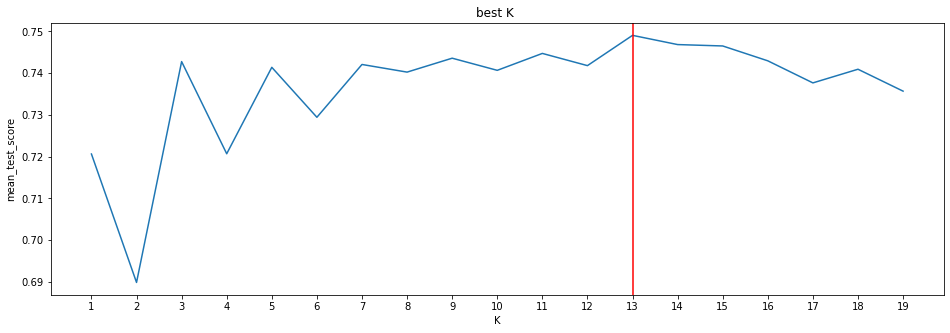

In [49]:
import matplotlib.pyplot as plt 
asseY = gs.cv_results_['mean_test_score']
asseX = list(range(1,20))
plt.figure(figsize = (16,5))
plt.plot(asseY)
plt.xticks(np.arange(len(asseY)), np.arange(1, len(asseY)+1)) #tick asse X

plt.title("best K ")
plt.xlabel("K")
plt.ylabel("mean_test_score")
max_value = max(asseY) 
max_index =np.where(asseY == max_value) #cerco dove il valore è max per stampare poi la linea rossa
plt.axvline(max_index, color = "r")
plt.show()

Possiamo adesso visualizzare l'output ottenuto dal tuning, ovvero il k migliore:

In [50]:
print("k migliore:", bestK)

k migliore: 13


Dopo aver stimato il parametro k ideale rieffettuiamo la classificazione e calcoliamo l'f1score e la matrice di confusione nuovamente:

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, train_set['class'])
x_test = count_vect.transform(test_set['text'])
y_test_pred2 = knn.predict(x_test)
f1_scores = f1_score(test_set['class'], y_test_pred2, average=None, labels=['programming'])[0]
print("F1-score k =",bestK,":", f1_scores)

F1-score k = 13 : 0.8034643570952699


Matrice di confusione con k ottimale:

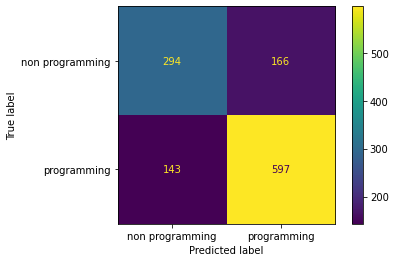

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_pred)

## 6. Ottimizzazione tramite rappresentazione TF-IDF

Si cerca adesso ad ottimizzare la rappresentazione dei dati a disposizione allo scopo di migliorare le performance del classificatore.
L'obiettivo è quello di fornire a parole meno frequenti (e quindi più significative) un peso maggiore e viceversa a parole più frequenti (meno significative) un peso minore. Questa tipologia di rappresentazione prende il nome di **TF-IDF** e permette di ottenere una classificazione più accurata e meno sensibile agli **outliers**.
Per realizzare quanto detto prima, verrà istanziato un nuovo classificatore che sarà però addestrato sui dati rappresentati tramite l'oggetto **TfidfTransformer** fornito da sklearn che calcola la rappresentazione **TF-IDF** dei post.

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False)

x_train_counts = count_vect.fit_transform(train_set['text'])
x_train_tf_idf = tf_transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(test_set['text'])
x_test_tf_idf = tf_transformer.fit_transform(x_test_counts)

Dopo aver ottenuto la rappresentazione tf-idf dei dati, ricerchiamo il k migliore per poi applicare l'algoritmo kNN:

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train_tf_idf,train_set['class'])
bestK2= gs.best_params_['n_neighbors']

In [55]:
print("k migliore tf-idf:", bestK2)

k migliore tf-idf: 10


Addestriamo ora l'algoritmo utilizzando il k migliore

In [56]:
classifier = KNeighborsClassifier(n_neighbors=bestK2)
classifier.fit(x_train_tf_idf, train_set['class'])

KNeighborsClassifier(n_neighbors=10)

calcoliamo l'**f1-score**:

In [57]:
y_test_preds = classifier.predict(x_test_tf_idf)
f1_scores=f1_score(test_set['class'],y_test_preds, average=None, labels=['programming'])[0]
print("f1-score tf-idf:",f1_scores)

f1-score tf-idf: 0.9019354838709678


Anche in questo caso è possibile ottenere la matrice di confusione:

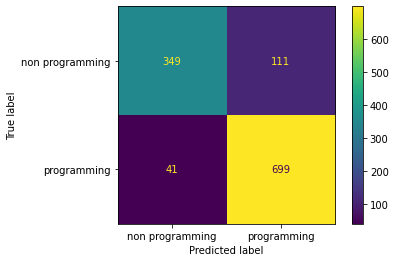

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_preds)

## 7. Confronto tra i vari classificatori

E' possibile adesso confrontare i tre risultati ottenuti visualizzando la **curva PR**, ovvero la curva che mette in realzione **precision** e **recall**. Prima di fare ciò è però necessario ai fini della rappresentazione, mappare i nomi delle classi, avremo dunque:
* **non programming** = 0;
* **programming** = 1;

Di seguito il processo di mapping e il plot della curva PR:

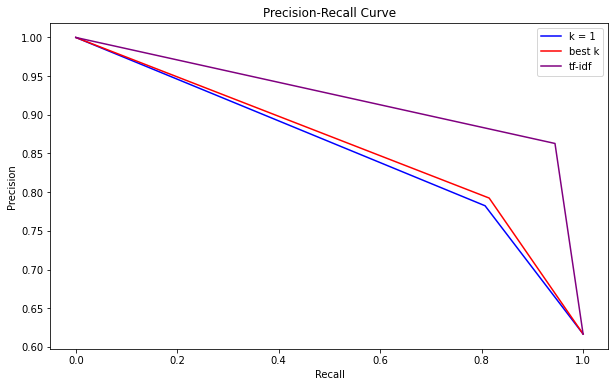

In [59]:
#map delle etichette reali
test_zero_one = test_set.copy()
test_zero_one = test_zero_one.replace(to_replace=['non programming', 'programming'], value=[0, 1])

#map delle varie predizioni
y_preds_zero_one_tf_idf = y_test_preds.copy()
for i in range(y_preds_zero_one_tf_idf.size):
    if(y_preds_zero_one_tf_idf[i] == 'programming'):
        y_preds_zero_one_tf_idf[i] = 1
    else:
        y_preds_zero_one_tf_idf[i] = 0

        
y_preds_zero_one_bestk = y_test_pred2.copy()
for i in range(y_preds_zero_one_bestk.size):
    if(y_preds_zero_one_bestk[i] == 'programming'):
        y_preds_zero_one_bestk[i] = 1
    else:
        y_preds_zero_one_bestk[i] = 0
        
y_preds_zero_one_k1 = y_test_pred.copy()
for i in range(y_preds_zero_one_k1.size):
    if(y_preds_zero_one_k1[i] == 'programming'):
        y_preds_zero_one_k1[i] = 1
    else:
        y_preds_zero_one_k1[i] = 0  
        
#generazione valori x,y della curva PR e plot
from sklearn.metrics import precision_recall_curve
from matplotlib.pyplot import figure
figure(figsize=(10, 6))

precision_k1, recall_k1, thresholds_k1 = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_k1)
plt.plot(recall_k1, precision_k1, color='blue', label='k = 1')

precision_bestk, recall_bestk, thresholds_bestk = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_bestk)
plt.plot(recall_bestk, precision_bestk, color='red', label='best k')

precision_tfidf, recall_tfidf, thresholds_tfidf = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_tf_idf)
plt.plot(recall_tfidf, precision_tfidf, color='purple', label='tf-idf')

plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.legend()
plt.show()

E' possibile adesso calcolare l'**area under the curver**, ovvero una metrica che calcolando l'area sottesa alla curva PR permette di stimare la bontà del classificatore. L'AUC è un valore compreso tra 0 e 1, idealmente vorremmo che il nostro classificatore abbia **AUC = 1**.

In [60]:
from sklearn.metrics import roc_auc_score
auc_k1 = roc_auc_score(test_zero_one['class'],y_preds_zero_one_k1)
auc_bestk = roc_auc_score(test_zero_one['class'],y_preds_zero_one_bestk)
auc_tfidf = roc_auc_score(test_zero_one['class'],y_preds_zero_one_tf_idf)

print('AUC k=1: %.3f' % auc_k1)
print('AUC best k: %.3f' % auc_bestk)
print('AUC tf-idf: %.3f' % auc_tfidf)

AUC k=1: 0.723
AUC best k: 0.736
AUC tf-idf: 0.852


## 8. Classificazione del linguaggio di programmazione

Dopo aver classificato i post, è possibile applicare un'altra istanza dell'algoritmo kNN in grado di predirre il linguaggio di interesse di un determinato post, a tal proposito utilizzeremo come dataset di partenza tutte le osservazioni classificate come "programming" dal precedente classificatore. 
Questo dataset dovrà quindi essere diviso in trainig set e test set per effettuare l'addestramento, il tuning dei parametri e una prova su dati mai visti.

Il primo passo è quello di creare  un dataframe che contiene solamente i post che sono stati classificati come "programming" nel test set utilizzato dall'algoritmo precedente. Avendo a disposizione il test set e gli indici ottenuti dal classificatore è sufficiente un'operazione di **filtraggio**.

Come prima cosa conserviamo solo gli indici dei post classificati come "non programming" in modo da rimuoverli successivamente dal dataset iniziale:

In [61]:
output = [idx for idx, element in enumerate(y_test_preds) if len(element) == 'non programming']

A questo punto, possono essere rimossi dal vecchio test set tutti i record la cui predizione è diversa da 'programming'. Otterremo il nuovo dataset (che verrà usato dal nuovo algoritmo) che prenderà il nome di **DfProg**:

In [62]:
dfProg = test_set.copy()
dfProg = dfProg.drop(labels=output, axis=0)
dfProg

,title,text,class,language
6673,Yamaha MT03 steering suddenly feels weir,Hi /rmotorcycles\n\nI've got a 2017 Yamaha MT0...,non programming,Not a language
2477,[GEAR] NGD My setup with a new PRS McCar,[New PRS McCarty 10 Top](https://imgur.com/a/y...,non programming,Not a language
4457,Highschool LaMelo asking if Luka Doncic,Who remembers that Ball in the Family episode ...,non programming,Not a language
4497,"Per Sam Amick on the Deuce & Mo Podcast,",Find it hilarious that the Lakers would even t...,non programming,Not a language
2411,Electric guitar to learn on [newbie],I wanna learn electric guitar\nAfter an age of...,non programming,Not a language
...,...,...,...,...
2917,Is IntelliJ the only working IDE for Kot,"I tried NetBeans, and discovered that its Kotl...",programming,Kotlin
9028,suggestion on a way to make a simple cli,"title says it all, id appreciate the help",programming,Go
2008,Headed to Morimoto on Saturday,Headed to Morimoto (in Philly) for the first t...,non programming,Not a language
6075,chat application kafka/angular,hi guys i want to create a chat application wi...,programming,Angular


Per rendere più accurata la classificazione, rimuoviamo adesso i record il cui linguaggio è "Not a language", essi infatti apparterrebbero ad una classe non utile ai nostri fini che potrebbe introdurre degli errori:

In [63]:
dfProg = dfProg[dfProg.language != 'Not a language']
dfProg

,title,text,class,language
5826,Router navigation stops working on iPhon,"Hello,\n\nI'm experiencing this incredibly wei...",programming,Angular
2985,"First time using Kotlin, issues with Roo",Please feel free to let me know if this would ...,programming,Kotlin
3731,how to optimize netty settings in ktor?,"Hi fellows, i am work with ktor and netty as s...",programming,Kotlin
9119,Busy waiting and the Go Memory Model,```\nvar a string\nvar done bool\n\nfunc setup...,programming,Go
8113,eMarket Online Store - OpenSource Engine,"Hello. In January 2021, I already presented th...",programming,PHP
...,...,...,...,...
9432,Use Go with jupyter notebook inside Visu,"Hi,\n\nIm a beginner at learning golang just w...",programming,Go
529,OptView2: an open source tool to inspect,Talk: [https://www.youtube.com/watch?v=nVc439d...,programming,C++
2917,Is IntelliJ the only working IDE for Kot,"I tried NetBeans, and discovered that its Kotl...",programming,Kotlin
9028,suggestion on a way to make a simple cli,"title says it all, id appreciate the help",programming,Go


Dopo aver ottenuto il dataset dfProg, il procedimento è simile al procedente, dunque dovremo dividere il dataset in **training set** e **test set** utilizzando sempre il **metodo holdout** citato precedentemente.

In [64]:
np.random.seed(1234)

train_set2, test_set2 = train_test_split(dfProg, test_size=0.25)
train_set2.info(); print('\n'); test_set2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 7784 to 6551
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     555 non-null    object
 1   text      555 non-null    object
 2   class     555 non-null    object
 3   language  555 non-null    object
dtypes: object(4)
memory usage: 21.7+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 869 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     185 non-null    object
 1   text      185 non-null    object
 2   class     185 non-null    object
 3   language  185 non-null    object
dtypes: object(4)
memory usage: 7.2+ KB


Possiamo adesso calcolare la rappresentazione **tf-idf** dei nuovi set

In [65]:
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False)

x_train_counts_language = count_vect.fit_transform(train_set2['text'])
x_train_tf_idf_language = tf_transformer.fit_transform(x_train_counts_language)

x_test_counts_language = count_vect.transform(test_set2['text'])
x_test_tf_idf_language = tf_transformer.fit_transform(x_test_counts_language)

In analogia ai passi precedenti, dopo aver ottenuto la rappresentazione tf-idf dei dati, viene cercato il **k migliore** tramite validation set:

In [66]:
knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train_tf_idf_language,train_set2['class'])
bestK_language= gs.best_params_['n_neighbors']

A questo punto è possibile effettuare il **training** dell'algoritmo:

In [67]:
classifier = KNeighborsClassifier(n_neighbors=bestK_language)
classifier.fit(x_train_tf_idf_language, train_set2['language'])

KNeighborsClassifier(n_neighbors=1)

E' possibile quindi applicare l'algoritmo alla prima osservazione del test set per verificarne il funzionamento:

In [68]:
test = test_set2.iloc[1]['text']
trueclass = test_set2.iloc[1]['language']
test

"i feel like a lot of codebases don't seem to use them -- is it mostly for test coverage?"

In [69]:
feats=count_vect.transform([test])

print("classe predetta:", classifier.predict(feats)[0])
print("classe reale:", trueclass)

classe predetta: C++
classe reale: C++


Il prossimo step è quello di calcolare le predizioni di tutto il test set e calcolare l'f1score per verificare la bontà dell'algoritmo:

In [70]:
y_test_preds_language = classifier.predict(x_test_tf_idf_language)
f1_scores=f1_score(test_set2['language'],y_test_preds_language, average=None)[0]
print("f1-score language classification:",f1_scores)

f1-score language classification: 0.5


E' inoltre possibile visualizzare una versione generalizzata al caso **non binario** della matrice di confusione del nuovo classificatore.

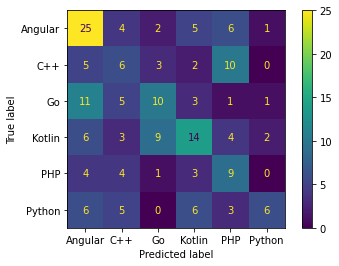

In [71]:
ConfusionMatrixDisplay.from_predictions(test_set2['language'], y_test_preds_language)

## 9. Sentiment analysis sui post che parlano di programmazione

Dopo aver classificato i post provenienti dai vari subreddit, verrà adesso analizzato il **sentiment** ovvero, lo stato d'animo dell'autore quando ha scritto quel determinato post. Alla fine verrà stimata una **media** dei sentiment per vedere se in generale, tramite Reddit gli utenti esprimono le loro problematiche o evidenziano i punti di forza di un linguaggio e lo consigliano.
Per portare a termine questo compito verrà usato l'algoritmo **VADER**, ovvero un algoritmo per la **sentiment analysis** slegato dal dominio delle osservazioni in input e che assegna ad ogni parola un punteggio, basato su statistiche ottenute dalla media di punteggi espressi da dei volontari durante la fase di creazione dell'algoritmo.
Per effettuare l'analisi utilizzando VADER faremo uso della libreria **nltk**.

Come prima cosa è necessario caricare il package di lexicon fornito da vader:

In [72]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rosario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

A questo punto sarà possibile creare l'oggetto **sid** che permetterà di effettuare il **calcolo del sentiment**.

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Prima di procedere con il calcolo del sentiment score, è necessario ai fini di una maggiore comprensione riorganizzare il dataset. A tal proposito sarannoeliminate le colonne "language" e "class" non utili ai fini dell'analisi e verrà inserita la colonna "**predicted_language**" contenente la predizione del linguaggio effettuta dal secondo algoritmo:

In [74]:
SentimentDf = test_set2.copy()

SentimentDf = SentimentDf.assign(predicted_language = y_test_preds_language)
SentimentDf.drop(columns=['language','class'], inplace=True)
SentimentDf

,title,text,predicted_language
869,Why was concept_map abandoned?,"Hello, Why was [concept\_map](https://isocpp.o...",PHP
1209,whatever happened to friend functions?,i feel like a lot of codebases don't seem to u...,C++
231,Improving image similarity detection by,I wrote some code using the Python library Fin...,Angular
3020,Do you use kotlin/js?,I would like to see how widespread kotlin/js i...,C++
6340,Resolving build/linkage errors in Angula,"To me, this could have been posted in the r/Ty...",Go
...,...,...,...
7853,Help from language designers,"Titles are hard, go easy.\n\nI am building a p...",C++
3101,My images grid recyclerview scrolling is,"Hello, please can you advice me what i do and ...",Go
9582,Closing custom http.Transport?,Sometimes I use a simple custom http.Transport...,C++
8174,phpReel - new PHP CMS for creating a sub,"Hello everyone!\n\nMy name is Paul, and I crea...",Kotlin


Verrà affiancata al dataframe una nuova colonna che prenderà il nome di **'score'** ottenuta dal lexicon score di vader, in questo modo sarà possibile osservare il post e il rispettivo punteggio.
Calcoliamo per ogni riga del dataframe già filtrato il **compound** del testo associato: VADER ritorna diversi valori in output che rappresentano la percentuale di positività, neutralità e negatività del testo analizzato, il compound non è altro che la media di essi, ovvero il lexicon score effettivo.

In [75]:
rows, cols = SentimentDf.shape
score = []
for i in range(rows):
    score.append(sid.polarity_scores(SentimentDf.iloc[i]['text'])['compound'])

In [76]:
SentimentDf = SentimentDf.assign(score = score)
SentimentDf

,title,text,predicted_language,score
869,Why was concept_map abandoned?,"Hello, Why was [concept\_map](https://isocpp.o...",PHP,0.4696
1209,whatever happened to friend functions?,i feel like a lot of codebases don't seem to u...,C++,0.3612
231,Improving image similarity detection by,I wrote some code using the Python library Fin...,Angular,0.7370
3020,Do you use kotlin/js?,I would like to see how widespread kotlin/js i...,C++,0.6599
6340,Resolving build/linkage errors in Angula,"To me, this could have been posted in the r/Ty...",Go,0.7912
...,...,...,...,...
7853,Help from language designers,"Titles are hard, go easy.\n\nI am building a p...",C++,0.9680
3101,My images grid recyclerview scrolling is,"Hello, please can you advice me what i do and ...",Go,0.0258
9582,Closing custom http.Transport?,Sometimes I use a simple custom http.Transport...,C++,-0.0489
8174,phpReel - new PHP CMS for creating a sub,"Hello everyone!\n\nMy name is Paul, and I crea...",Kotlin,0.4559


Il compound è un valore compreso tra -1 e 1, dove 1 indica che il sentiment della frase è totalmente positivo mentre -1 che il sentiment è totalmente negativo.

Come ultimo passaggio dell'analisi è possibile adesso calcolare la media dello score delle valutazioni raggruppate per linguaggio per vedere in generale il sentiment rispetto a quello che sono i post nei subreddit di programmazione: la media sarà superiore allo zero in caso di esito positivo e inferiore nel caso contrario:

In [77]:
dfMean = SentimentDf.groupby('predicted_language').mean()
dfMean

,score
predicted_language,
Angular,0.562004
C++,0.536893
Go,0.219496
Kotlin,0.466579
PHP,0.499561
Python,0.255450


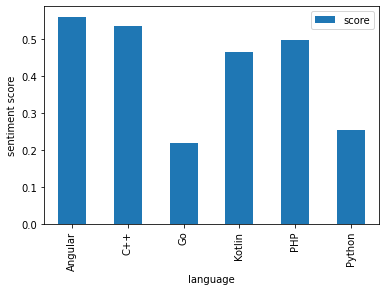

In [78]:
dfMean.plot.bar(y = 'score')
plt.xlabel('language')
plt.ylabel('sentiment score')
a = np.arange(-1,1,0.1)
plt.show()

## 10. Conclusioni

Concludendo, quella ottenuta è una **pipeline** che dato un insieme di post provenienti da Reddit (comunque generalizzabile a qualsiasi fonte) permette di estrarre solo quelli che trattano di programmazione e di analizzarne il sentiment in modo da trarre delle conclusioni e stimare il pensiero degli utenti che fanno uso dei vari linguaggi. Sono state marcate le differenze tra le varie ottimizzazioni che è possibile applicare ad un algoritmo semplice come il kNN che si ricorda essere un algoritmo **lazy**, ovvero un algoritmo la cui fase di training si limita a memorizzare il training set e ad approssimare una pseudofunzione di classificazione solo nel momento in cui viene richiesto di classificare una nuova osservazione. 
Generalizzando, questa catena di processi è utilizzabile ogni qual volta data una quantità di dati generici, si vuole isolare una sola categoria di essi per capire se di quest'ultima si sta parlando positivamente o meno rispetto alle altre. Il processo è applicabile in molti contesti e quello dei post di un social network ne è l'esempio più generale.